In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Load The Data**

In [3]:
current_dir = os.getcwd() 
relative_path = os.path.join('..', 'data', 'dataset.csv')
dataset = pd.read_csv(os.path.join(current_dir, relative_path))

**Describe The Data**

In [39]:
print(dataset.shape)

(1470, 35)


In [40]:
print(dataset.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [51]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [41]:
# generates descriptive statistics of the training data
# include="O": This parameter is specifying that you want to include columns with object data type 
dataset.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


**plot histogram for each numeric variable/feature of the dataset**

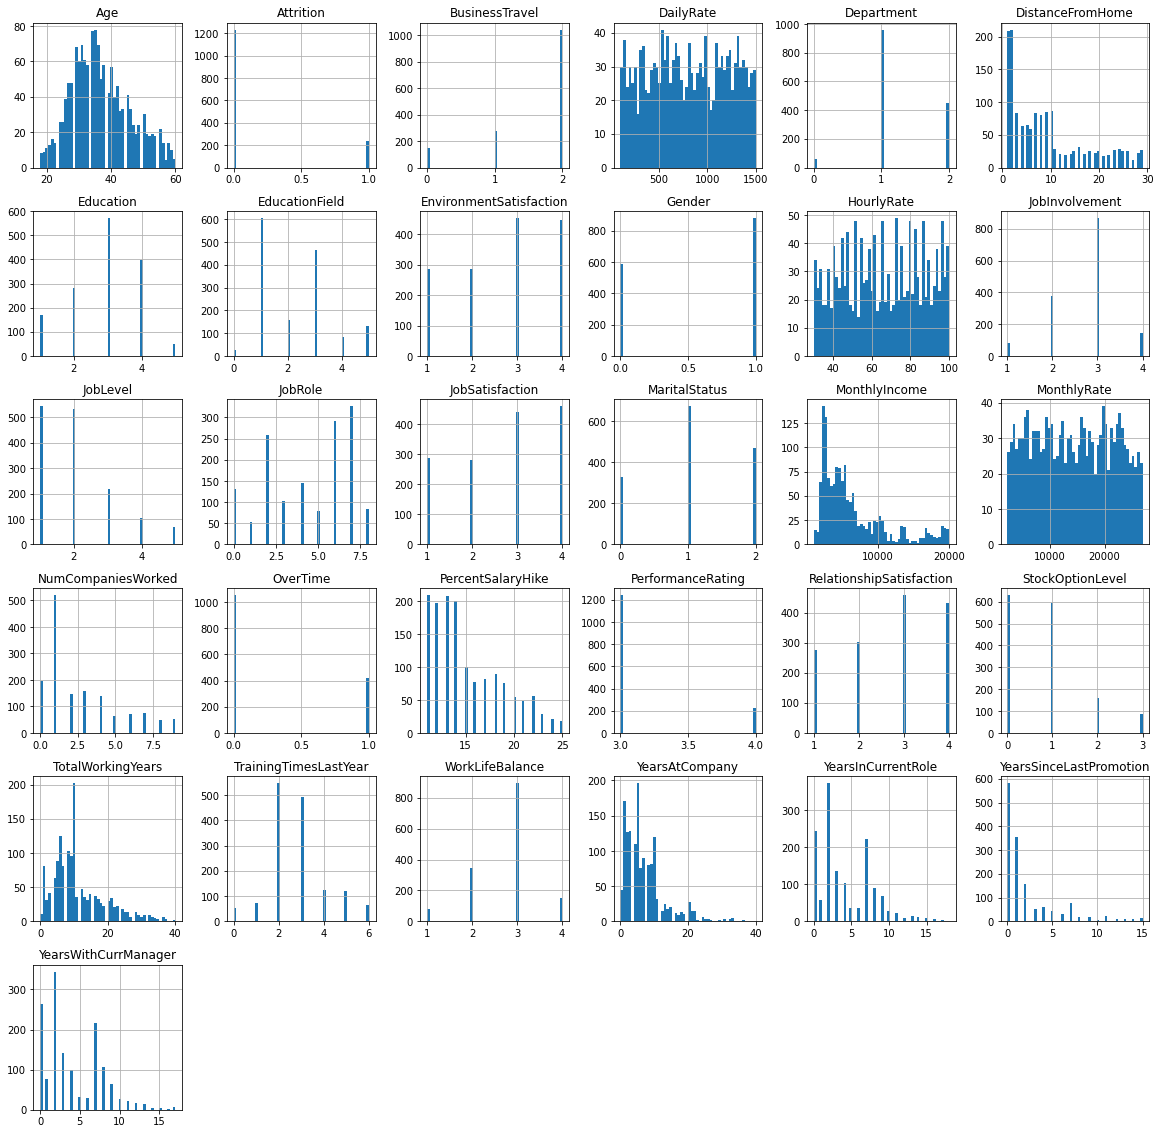

In [63]:
#plot histogram for each numeric variable/feature of the dataset
dataset.hist(figsize=(20,20), bins=50)
plt.show()

**Check For Dupliates**

In [53]:
print("Total number of duplicates : ",dataset.duplicated().sum().sum())

Total number of duplicates :  0


**Check For Nulls**

In [54]:
print("Total number of missing values : " , dataset.isnull().sum().sum())

Total number of missing values :  0


**Get the number of unique values for each columm**

In [55]:
# Check for constant data
no_unique_values = dataset.nunique()

no_unique_values

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [56]:
'''
 ('EmployeeCount', 'Over18', 'StandardHours') were found to have constant values for all 1470 rows.
Also, 'EmployeeNumber' is a unique identifier for all 1470 rows.
 These 4 columns should be dropped as they would not be helpful in predicting attrition.
'''

"\n ('EmployeeCount', 'Over18', 'StandardHours') were found to have constant values for all 1470 rows.\nAlso, 'EmployeeNumber' is a unique identifier for all 1470 rows.\n These 4 columns should be dropped as they would not be helpful in predicting attrition.\n"

In [5]:
# Drop the 4 columns
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
dataset = dataset.drop(columns=columns_to_drop)

**Encode Categorical Variables**

In [6]:
obj_cols = dataset.select_dtypes(include = 'object').columns
print("number of categorical variable : ",len(obj_cols))

obj_cols


dataset[obj_cols].nunique()


for i in obj_cols:
  print(i,' : ' , dataset[i].unique())
  print('-'*50)

number of categorical variable :  8
Attrition  :  ['Yes' 'No']
--------------------------------------------------
BusinessTravel  :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------
Department  :  ['Sales' 'Research & Development' 'Human Resources']
--------------------------------------------------
EducationField  :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------------------------------------
Gender  :  ['Female' 'Male']
--------------------------------------------------
JobRole  :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
--------------------------------------------------
MaritalStatus  :  ['Single' 'Married' 'Divorced']
--------------------------------------------------
OverTime  :  ['Yes' 'No']
-----------------------------

In [7]:
encoder = LabelEncoder()
for i in obj_cols:
    dataset[i] = encoder.fit_transform(dataset[i])

In [8]:
obj_cols = dataset.select_dtypes(include = 'object').columns
print("number of categorical variable : ",len(obj_cols))

obj_cols

number of categorical variable :  0


Index([], dtype='object')

In [86]:
dataset

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,1102,2,1,2,1,2,0,3,...,4,2,8,1,1,0,0,1,6,0
1,49,0,279,1,8,1,1,3,1,2,...,2,1,1,0,4,1,3,3,10,1
2,37,1,1373,1,2,2,4,4,1,2,...,3,2,6,1,2,0,3,3,0,0
3,33,0,1392,1,3,4,1,4,0,3,...,3,1,1,1,3,0,3,3,8,3
4,27,0,591,1,2,1,3,1,1,3,...,2,1,9,0,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,3,3,1,4,...,4,1,4,0,3,1,3,3,5,0
1466,39,0,613,1,6,1,3,4,1,2,...,1,1,4,0,1,1,5,3,7,1
1467,27,0,155,1,4,3,1,2,1,4,...,2,1,1,1,2,1,0,3,6,0
1468,49,0,1023,2,2,3,3,4,1,2,...,2,1,2,0,4,0,3,2,9,0


In [11]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(col_outliers)
    return outlier_counts

# Detect outliers in the DataFrame
outlier_counts = detect_outliers_iqr(dataset)
print("Number of rows with outliers in each column:")
for col, count in outlier_counts.items():
    if count !=0:
        print(f"Column {col}: {count} rows with outliers")

Number of rows with outliers in each column:
Column Attrition: 237 rows with outliers
Column MonthlyIncome: 114 rows with outliers
Column NumCompaniesWorked: 52 rows with outliers
Column PerformanceRating: 226 rows with outliers
Column StockOptionLevel: 85 rows with outliers
Column TotalWorkingYears: 63 rows with outliers
Column TrainingTimesLastYear: 238 rows with outliers
Column YearsAtCompany: 104 rows with outliers
Column YearsInCurrentRole: 21 rows with outliers
Column YearsSinceLastPromotion: 107 rows with outliers
Column YearsWithCurrManager: 14 rows with outliers


**Show Correlation Between the target variables and each feature**

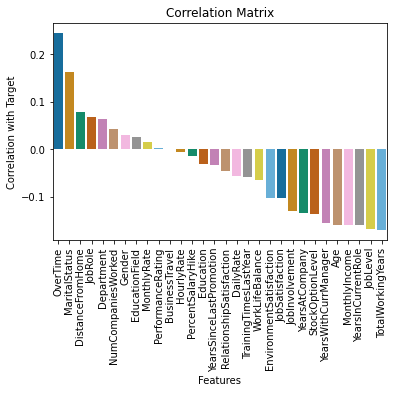

In [65]:
features = dataset.drop(columns = ['Attrition'])
correlation = features.corrwith((dataset.Attrition)).sort_values(ascending = False)

sns.barplot(x = correlation.index , y = correlation.values , palette = 'colorblind')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation Matrix')
plt.show()

**Confusion Matrix**

<AxesSubplot:>

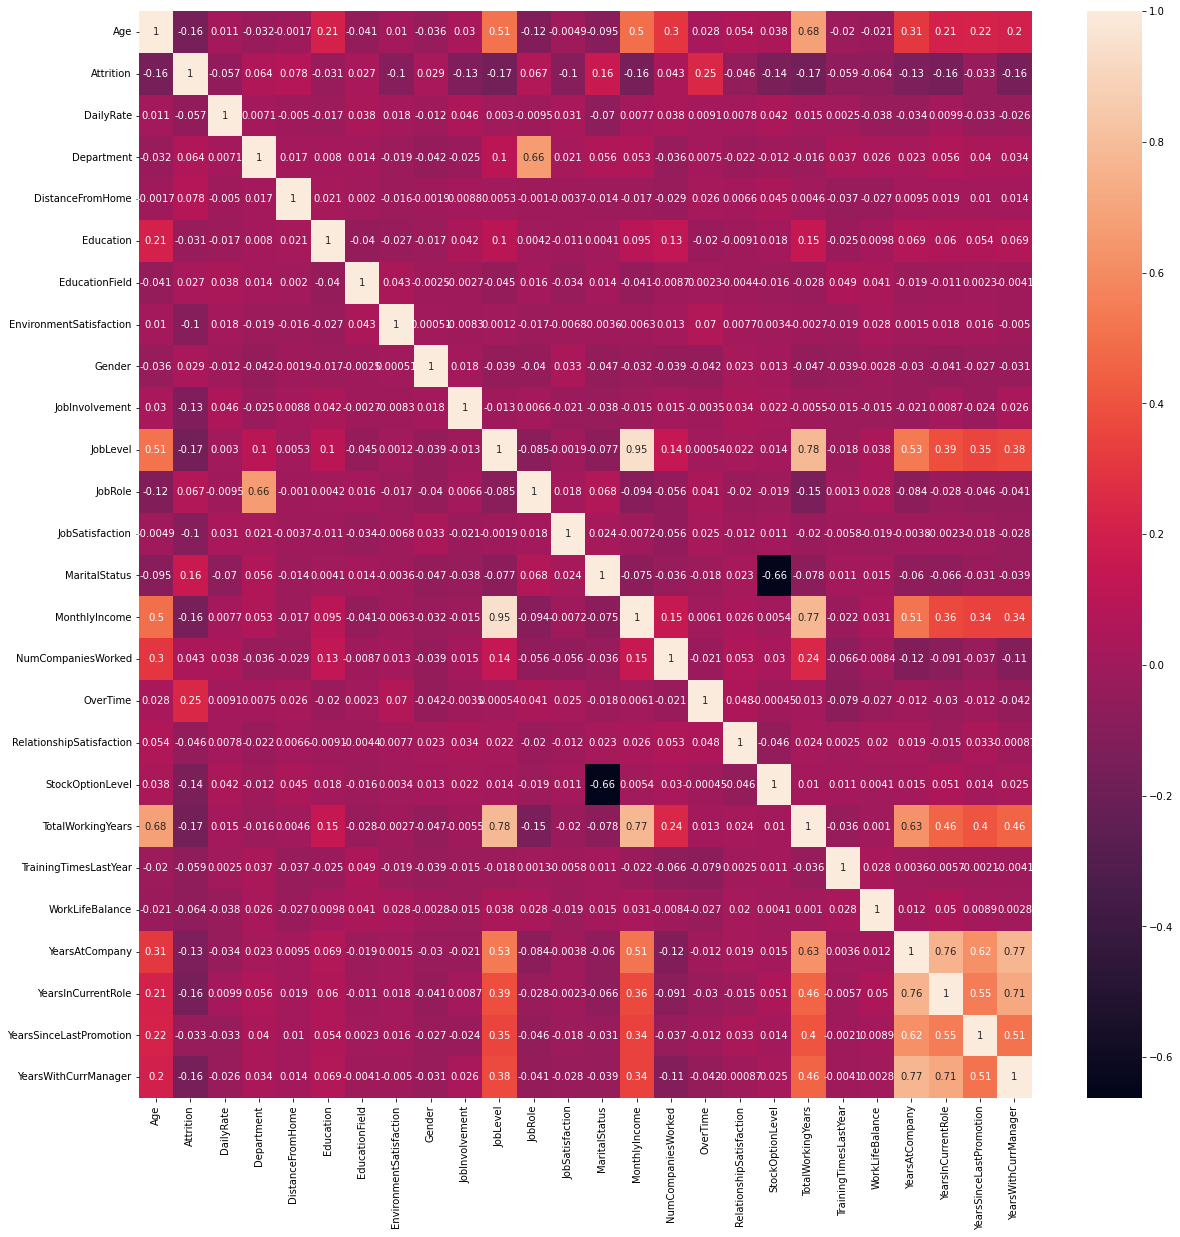

In [71]:
correlations=dataset.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations,annot=True)

In [72]:
'''
There are high correlation between some features:
    MonthlyIncome & joblevel ===> drop MonthlyIncome
    Total working years & Joblevel ===> drop TotalWorkingYears
    years in current role, years at company & years with current manager

Remove MonthlyIncome,TotalWorkingYears, YearsInCurrentRole and YearsWithCurrManager
taking a cutoff of 0.7 correlation coefficient. 
This will retain JobLevel and YearsAtCompany and remove possibility of multicollinearity from the features

'''
dataset = dataset.drop(columns=['MonthlyIncome','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'])

**Check for imbalance**

In [79]:
# Check for imbalance
attrition_counts = dataset['Attrition'].value_counts()
attrition_counts

0    1233
1     237
Name: Attrition, dtype: int64

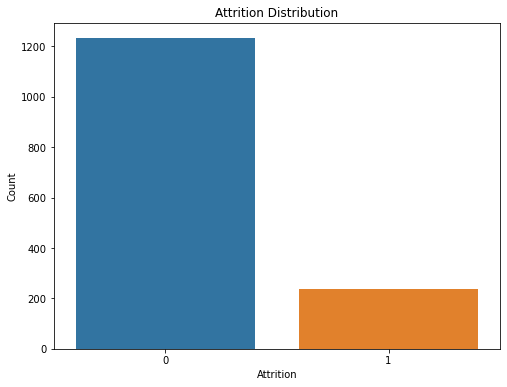

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=dataset)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [ ]:
'''
As expected, the 'Attrition' column shows a significant class imbalance with 1233 'No' and 237 'Yes'.
This imbalance should be addressed prior to model training
to prevent overemphasis towards 'No' class when our study focus is on the employees who attrite - 'Yes'.
'''

In [73]:
# Split the dataset into features (X) and target (y)
x = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

**Scale The Data**

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

**Split The Data into training, validation, and testing sets**

In [76]:
# Split the dataset into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [78]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

882
294
294


**Resampling**

SMOTE

In [95]:
#perform a sampling technique to balance the dataset for data['Attrition'] ==1 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, sampling_strategy='minority')
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


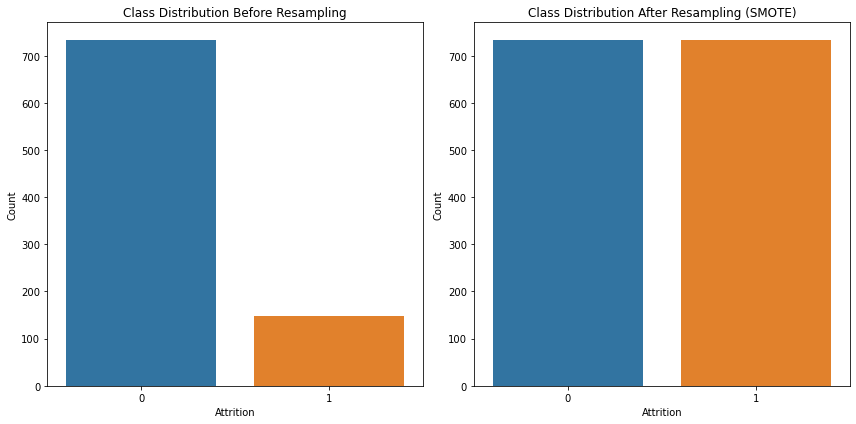

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the class distribution before resampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Plotting the class distribution after resampling
plt.subplot(1, 2, 2)
sns.countplot(y_train_smote)
plt.title('Class Distribution After Resampling (SMOTE)')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


RandomOverSampler

In [96]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


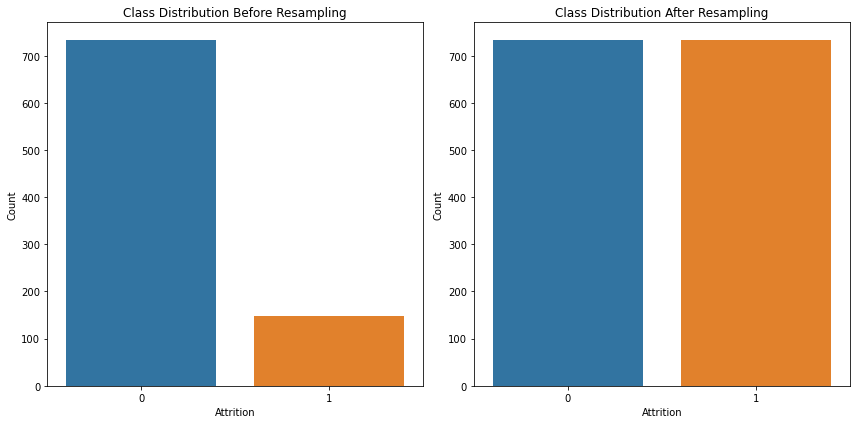

In [132]:


# Plotting the class distribution before resampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Plotting the class distribution after resampling
plt.subplot(1, 2, 2)
sns.countplot(y_train_ros)
plt.title('Class Distribution After Resampling (RandomOverSampler)')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


SMOTETomek

In [97]:
from imblearn.combine import SMOTETomek
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
x_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


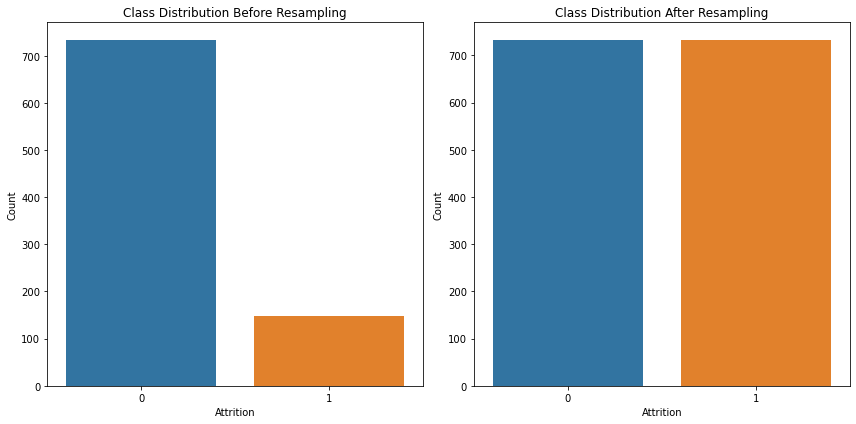

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the class distribution before resampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Plotting the class distribution after resampling
plt.subplot(1, 2, 2)
sns.countplot(y_train_smotetomek)
plt.title('Class Distribution After Resampling (smotetomek)')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


RandomUnderSampler

In [99]:
from imblearn.under_sampling import RandomUnderSampler
# Undersampling
undersampler = RandomUnderSampler(random_state=42)
x_train_rur, y_train_rur= undersampler.fit_resample(x_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


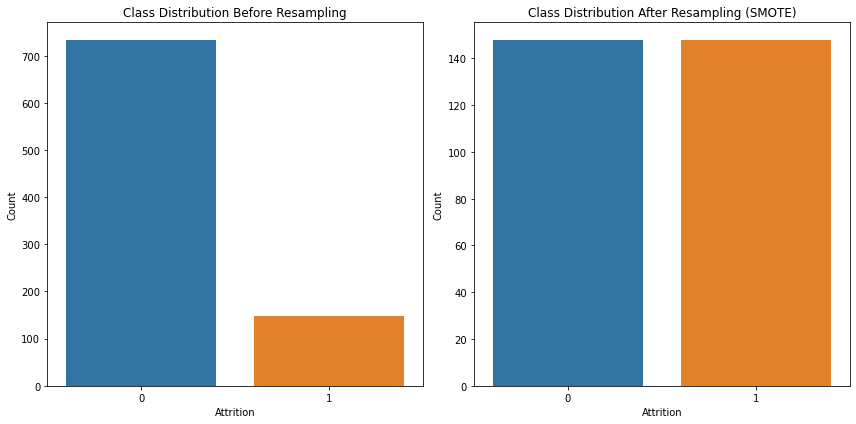

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the class distribution before resampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Plotting the class distribution after resampling
plt.subplot(1, 2, 2)
sns.countplot(y_train_rur)
plt.title('Class Distribution After Resampling (Undersampling)')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Save The Data**

In [100]:
x_train_df = pd.DataFrame(x_train)
y_train_df = pd.DataFrame(y_train)

x_val_df = pd.DataFrame(x_val)
y_val_df = pd.DataFrame(y_val)

x_test_df = pd.DataFrame(x_test)
y_test_df = pd.DataFrame(y_test)

x_train_smote_df = pd.DataFrame(x_train_smote)
y_train_smote_df = pd.DataFrame(y_train_smote)

x_train_ros_df = pd.DataFrame(x_train_ros)
y_train_ros_df = pd.DataFrame(y_train_ros)

x_train_rur_df = pd.DataFrame(x_train_rur)
y_train_rur_df = pd.DataFrame(y_train_rur)

x_train_smotetomek_df = pd.DataFrame(x_train_smotetomek)
y_train_smotetomek_df = pd.DataFrame(y_train_smotetomek)

# Save to CSV files
relative_path = os.path.join('..', 'data', 'x_train.csv')
x_train_df.to_csv(os.path.join(current_dir, relative_path), index=False)
relative_path = os.path.join('..', 'data', 'y_train.csv')
y_train_df.to_csv(os.path.join(current_dir, relative_path), index=False)

relative_path = os.path.join('..', 'data', 'x_val.csv')
x_val_df.to_csv(os.path.join(current_dir, relative_path), index=False)
relative_path = os.path.join('..', 'data', 'y_val.csv')
y_val_df.to_csv(os.path.join(current_dir, relative_path), index=False)

relative_path = os.path.join('..', 'data', 'x_test.csv')
x_test_df.to_csv(os.path.join(current_dir, relative_path), index=False)
relative_path = os.path.join('..', 'data', 'y_test.csv')
y_test_df.to_csv(os.path.join(current_dir, relative_path), index=False)

relative_path = os.path.join('..', 'data', 'x_train_smote.csv')
x_train_smote_df.to_csv(os.path.join(current_dir, relative_path), index=False)
relative_path = os.path.join('..', 'data', 'y_train_smote.csv')
y_train_smote_df.to_csv(os.path.join(current_dir, relative_path), index=False)

relative_path = os.path.join('..', 'data', 'x_train_ros.csv')
x_train_ros_df.to_csv(os.path.join(current_dir, relative_path), index=False)
relative_path = os.path.join('..', 'data', 'y_train_ros.csv')
y_train_ros_df.to_csv(os.path.join(current_dir, relative_path), index=False)

relative_path = os.path.join('..', 'data', 'x_train_rur.csv')
x_train_rur_df.to_csv(os.path.join(current_dir, relative_path), index=False)
relative_path = os.path.join('..', 'data', 'y_train_rur.csv')
y_train_rur_df.to_csv(os.path.join(current_dir, relative_path), index=False)

relative_path = os.path.join('..', 'data', 'x_train_smotetomek.csv')
x_train_smotetomek_df.to_csv(os.path.join(current_dir, relative_path), index=False)
relative_path = os.path.join('..', 'data', 'y_train_smotetomek.csv')
y_train_smotetomek_df.to_csv(os.path.join(current_dir, relative_path), index=False)